<a href="https://colab.research.google.com/github/pavansai26/MASK-DETECTION/blob/master/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **importing the deep learning libraries**

In [ ]:
from keras.utils import np_utils
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

# **importing the deep learning libraries**

In [ ]:

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from keras.models import load_model

# **filtering the warnings**

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# **accessing the drive**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# **giving the dataset path**

In [ ]:
data_path = '/gdrive/My Drive/dataset'

# **creating the labels for the data**

In [ ]:
categories = os.listdir(data_path)

labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories,labels))

print(label_dict)
print()
print(categories)
print()
print(labels)


{'with mask': 0, 'without mask': 1}

['with mask', 'without mask']

[0, 1]


# **resizing the images**

In [ ]:
img_size = 100
data = []
target = []

for category in categories:
  folder_path = os.path.join(data_path,category)
  img_names = os.listdir(folder_path)

  for img_name in img_names:
    img_path = os.path.join(folder_path,img_name)
    img=cv2.imread(img_path)
    #reading the images

    try:
      gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      #Converting the image into gray scale
      resized = cv2.resize(gray,(img_size,img_size))
      #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
      data.append(resized)
      #appending the resized image
      target.append(label_dict[category])
      #appending the label(categorized) into the list (dataset)

    except Exception as e:
      print('Exception:',e)
      #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
data = np.array(data)/255.0
#normalizing the data
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
#reshaping the data
target = np.array(target)



# convert the target into numerical

In [ ]:
new_target=np_utils.to_categorical(target)

In [ ]:
np.save('data',data)
#saving the data in npy format
np.save('target',new_target)
#saving the target in npy format

In [ ]:
data=np.load('data.npy')
#loading the data
target=np.load('target.npy')
#loading the target

# **model building**

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_initializer='glorot_normal',input_shape=data.shape[1:]))
#convolution_layer1
model.add(Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer='glorot_normal'))
#convolution_layer2
model.add(MaxPooling2D(pool_size=(2,2)))
#maxpooling_layer1
model.add(BatchNormalization())
#batch normalization_layer1
model.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer='glorot_normal'))
#convolution_layer3
model.add(Conv2D(256,(3,3),activation='relu',padding='same',kernel_initializer='glorot_normal'))
#convolution_layer4
model.add(MaxPooling2D(pool_size=(2,2)))
#maxpooling_layer2
model.add(BatchNormalization())
#batch nomalization_layer2
model.add(Flatten())
#Flatten layer to stack the output convolutions from previous convolution layer
model.add(Dropout(0.5))
#dropout layer
model.add(Dense(50,activation='relu'))
#Dense layer
model.add(Dense(25,activation='relu'))
#dense layer
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories





# **compiling the model**

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# **printing the model summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 256)       0

# **installing the visualization libraries**

In [ ]:
pip install pydot

In [ ]:
pip install graphviz

# **importing the visualization libraries**

In [ ]:
import pydot
import graphviz

# **visualizing the model**

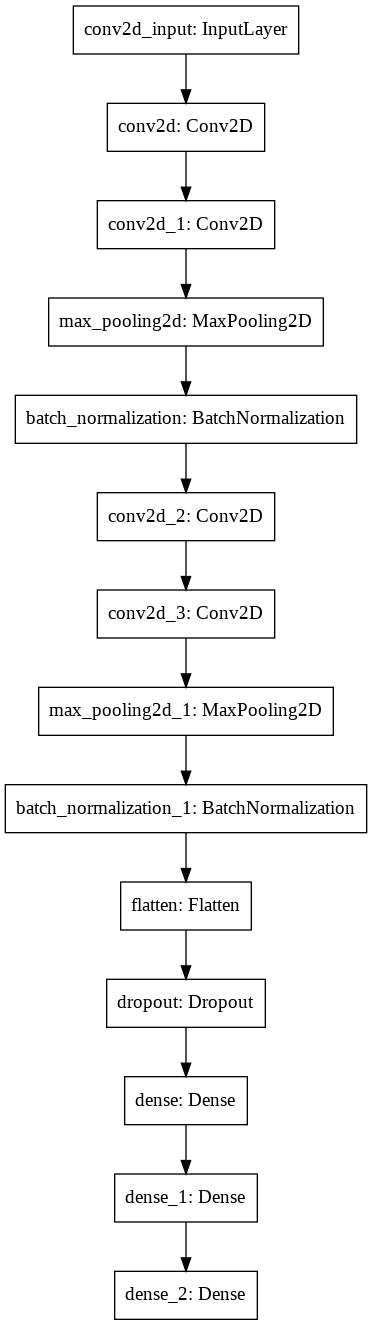

In [ ]:
tf.keras.utils.plot_model(model,to_file='model.jpg',show_layer_names=True,
                          rankdir='TB',expand_nested=True,dpi=96)

# **splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

# **creating the check point to the model**

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

# **model training**

In [ ]:
history=model.fit(train_data,train_target,epochs=30,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/30
31/31 [==============================] - ETA: 0s - loss: 1.8844 - accuracy: 0.7960WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model/assets
31/31 [==============================] - 7s 231ms/step - loss: 1.8844 - accuracy: 0.7960 - val_loss: 2.6543 - val_accuracy: 0.6250
Epoch 2/30
31/31 [==============================] - 6s 181ms/step - loss: 1.7560 - accuracy: 0.8535 - val_loss: 1.4612 - val_accuracy: 0.7379
Epoch 3/30
31/31 [==============================] - 4s 117ms/step - loss: 1.1287 - accuracy: 0.8970 - va

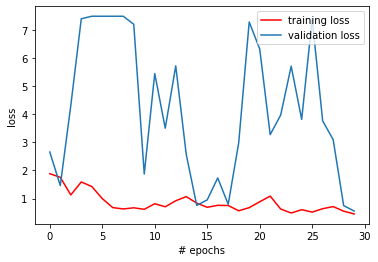

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

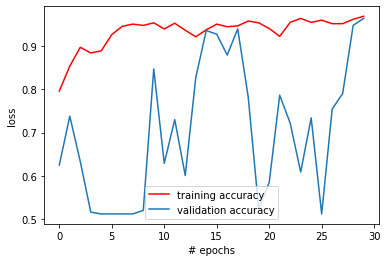

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 76ms/step - loss: 0.8502 - accuracy: 0.9420
[0.8501895666122437, 0.9420289993286133]


# **saving the model**

In [ ]:
model.save('trainedmodel.h5')

In [ ]:
model = load_model('trainedmodel.h5')

face_clsfr=cv2.CascadeClassifier('/gdrive/My Drive/haarcascade_frontalface_default.xml')

labels_dict={0:'with_mask',1:'without_mask'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
source=cv2.VideoCapture('/gdrive/My Drive/sample_videos/3.mp4')

In [ ]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2_imshow(img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()